#### Installing Packages and Libraries

In [1]:
import os
import cv2
import imghdr
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
import seaborn as sns
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

c:\Users\mcw\miniconda3\envs\pingu\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mcw\miniconda3\envs\pingu\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\mcw\miniconda3\envs\pingu\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\mcw\AppData\Local\Temp\ipykernel_16568\3050599782.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
root_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(root_dir,"data")
model_dir = os.path.join(root_dir,"model")

#### Visualize Image

In [3]:
# image = cv2.imread(img_path) # 3D --> H X W X C
# color_corrected_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(color_corrected_img)

#### Remove Unformated Images

In [4]:
os.listdir(data_dir)

['rose', 'sunflower']

In [5]:
len(os.listdir("../data/rose/")),len(os.listdir("../data/sunflower/"))

(147, 154)

In [6]:
xtensions = ["png","jpeg","jpg"]

In [7]:
for img_class in os.listdir(data_dir):
    img_class_path = os.path.join(data_dir,img_class)
    for img in os.listdir(img_class_path):
        img_path = os.path.join(img_class_path,img)
        try:
            image = cv2.imread(img_path) # 3D --> H X W X C
            extension = imghdr.what(img_path)
            if extension not in xtensions:
                print("Img is not in the specified extension",img_path)
                os.remove(img_path)
        except Exception as e:
            print("Error with Image",img_path)

In [8]:
len(os.listdir("../data/rose/")),len(os.listdir("../data/sunflower/"))

(147, 154)

#### Load data into Tensorflow dataset

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 301 files belonging to 2 classes.


In [10]:
image_Data - > Number of images x Height x Width x Channel
image_Label - >

SyntaxError: invalid syntax (3074239036.py, line 1)

In [11]:
len(data)

10

In [12]:
labels = data.class_names
print(labels)

['rose', 'sunflower']


In [13]:
for image_data,image_label in data:
    print(image_data.shape,image_label)
    break

(32, 256, 256, 3) tf.Tensor([1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0], shape=(32,), dtype=int32)


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
family_array = ["agi","evan","kani","vetri","arun"]

In [17]:
for index,member in enumerate(family_array):
    print("Member --> ",member,"|","Index --> ",index)

Member -->  agi | Index -->  0
Member -->  evan | Index -->  1
Member -->  kani | Index -->  2
Member -->  vetri | Index -->  3
Member -->  arun | Index -->  4


In [18]:
for i in range(len(family_array)):
    print(i,family_array[i])

0 agi
1 evan
2 kani
3 vetri
4 arun


In [19]:
for member in family_array:
    print(member,family_array.index(member))

agi 0
evan 1
kani 2
vetri 3
arun 4


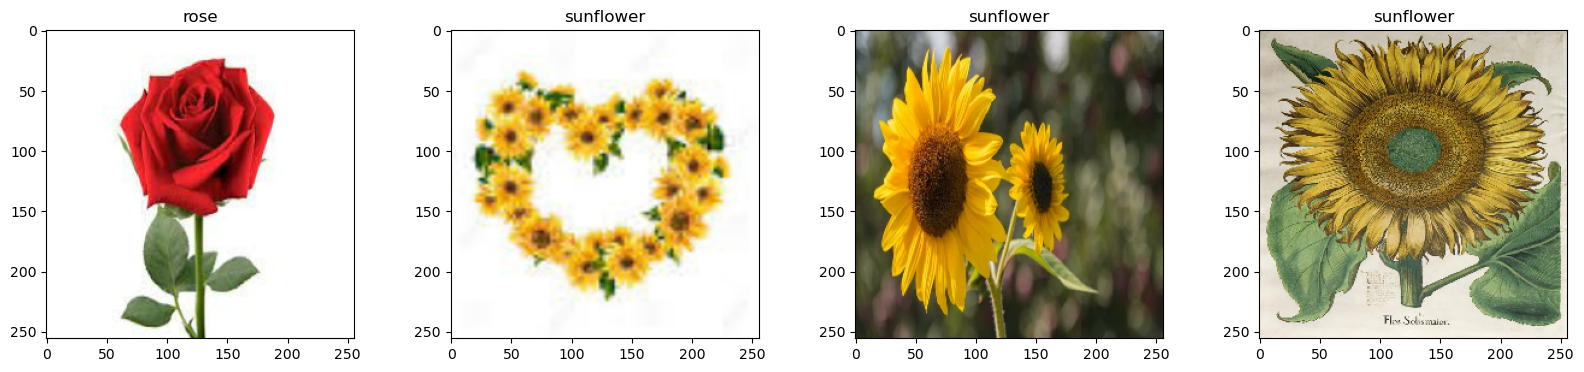

In [20]:
figure,ax = plt.subplots(ncols=4,figsize=(20,4))
for index, imgg in enumerate(batch[0][:4]):
    ax[index].imshow(imgg.astype("int"))
    ax[index].title.set_text(labels[batch[1][index]])

#### Split data in train, val, test

In [21]:
Dataset    = 100 %
Train      = 70 % (70/100)
Validation = 10 % (10/100)
Test       = 20 % (20/100)

SyntaxError: invalid syntax (1642122993.py, line 1)

In [ ]:
COLOR CODE --> (256,256,3)
0 TO 256 -- Generate max and min

In [22]:
array = np.array([1,2,3,4,5,6,7,8,9,10])

In [23]:
(3-1)/9

0.2222222222222222

In [24]:
max(array),min(array)

(10, 1)

In [25]:
new_array = (array - min(array)) / (max(array) - min(array))

In [26]:
new_array

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [27]:
0 to 255

SyntaxError: invalid syntax (868472195.py, line 1)

In [28]:
dataset = data.map(lambda x,y:(x/255,y))

In [29]:
len(dataset)

10

In [30]:
train_size = int(len(dataset) * 0.70)
val_size = int(len(dataset) * 0.10)
test_size = int(len(dataset) * 0.20)
print(train_size,val_size,test_size)

7 1 2


In [31]:
# model
# 1. Train - Train dataset (seen)
# 2. Validate - Val dataset (seen)
# 3. Test - Test dataset (unseen)

In [32]:
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size).take(val_size)
test_data = dataset.skip(train_size+val_size).take(test_size)

#### Model Building

In [33]:
model = Sequential()

In [34]:
# relu, sigmoid, tanh

In [35]:
model.add(Conv2D(12,(3,3),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(24,(3,3),1,activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(48,(3,3),1,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [36]:
tf.keras.optimizers.Adam??

Init signature:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    **kwargs,
)
Docstring:     
Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.

According to
[Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
the method is "*computationally
efficient, has little memory requirement, invariant to diagonal rescaling of
gradients, and is well suited for problems that are large in terms of
data/parameters*".

Args:
  learning_rate: A `tf.Tensor`, floating point value, a schedule that is a
    `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
    that takes no argu

In [37]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 12)      336       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 12)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 24)      2616      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 48)        10416     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 48)        0

#### Model Training

In [39]:
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
7/7 [==============================] - 14s 1s/step - loss: 0.9292 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4062
Epoch 2/10
7/7 [==============================] - 12s 1s/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 3/10
7/7 [==============================] - 12s 1s/step - loss: 0.6930 - accuracy: 0.5223 - val_loss: 0.6929 - val_accuracy: 0.5312
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.6930 - accuracy: 0.5312 - val_loss: 0.6934 - val_accuracy: 0.4688
Epoch 5/10
7/7 [==============================] - 12s 1s/step - loss: 0.6751 - accuracy: 0.5134 - val_loss: 0.5971 - val_accuracy: 0.5312
Epoch 6/10
7/7 [==============================] - 14s 2s/step - loss: 0.6159 - accuracy: 0.4777 - val_loss: 0.5879 - val_accuracy: 0.4688
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.5152 - accuracy: 0.5089 - val_loss: 0.4627 - val_accuracy: 0.5312
Epoch 8/10
7/7 [==================

#### Model Evaluation

In [40]:
eval_scores = model.evaluate(val_data)

1/1 [==============================] - 4s 4s/step - loss: 0.6475 - accuracy: 0.8750


#### Visualize Loss and Accuracy

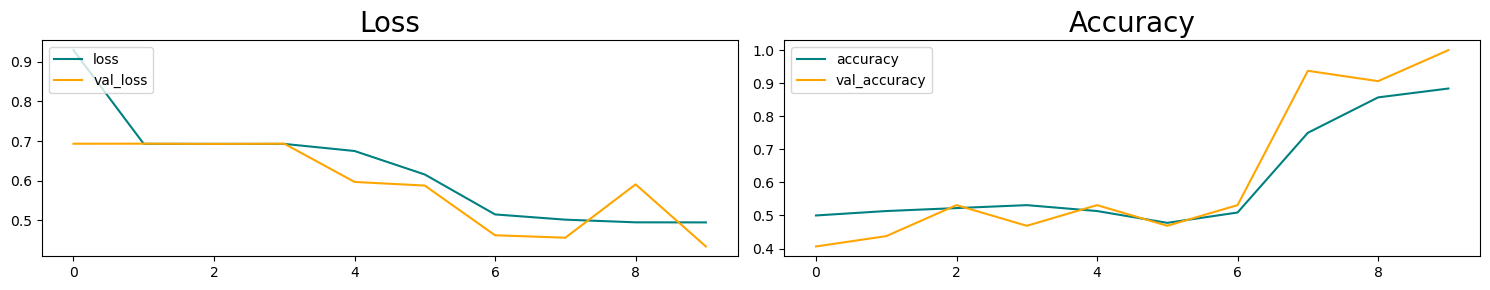

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# First subplot - Loss
axes[0].plot(history.history['loss'], color='teal', label='loss')
axes[0].plot(history.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=20)
axes[0].legend(loc="upper left")

# Second subplot - Accuracy
axes[1].plot(history.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=20)
axes[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

#### Model Testing

In [42]:
predictions = []
targets = []
for test_batch in test_data:
    x,y = test_batch
    y_pred = model.predict(x)
    predictions.append(y_pred)
    targets.append(y.numpy())

1/1 [==============================] - 0s 369ms/step


In [43]:
true_labels = targets[0]

In [44]:
pred_labels = (np.squeeze(np.array(predictions[0]))>0.5).astype("int")

In [ ]:
four possibility
1. Rose flower --> Rose flower
2. Rose flower --> Sun flower
3. Sun flower --> Rose flower
4. Sun flower --> Sun flower

In [45]:
cm = tf.math.confusion_matrix(true_labels,pred_labels).numpy()

In [46]:
unmai = [1,0,1,0]
poi = [1,0,0,0]

In [47]:
sonf_matrix = tf.math.confusion_matrix(unmai,poi).numpy()
sonf_matrix

array([[2, 0],
       [1, 1]])

In [48]:
cr = classification_report(true_labels,pred_labels)

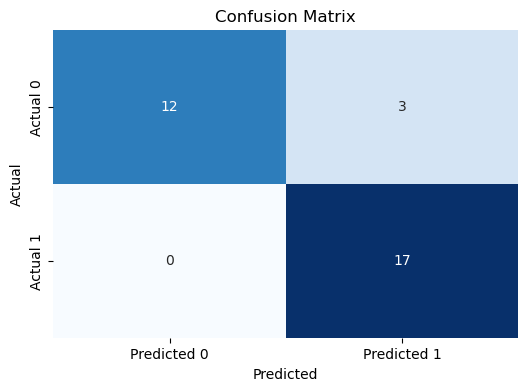

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.85      1.00      0.92        17

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.92      0.91      0.90        32



#### Model saving

In [51]:
model.save(os.path.join(model_dir,"flower_classifier.h5"))

c:\Users\mcw\miniconda3\envs\pingu\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
